# Juego de la Vida (Game of Life)
El **Juego de la Vida**, también conocido como **Vida**, es un autómata celular diseñador por el matemático británico John Horton Conway en 1970. Es un juego sin jugadores, esto significa que su evolución está determinada por su estado inicial, sin requerir más entradas. Uno interactúa con el Juego de la Vida al crear un estado inicial (o configuración inicial) y se observa como evoluciona. Es Turing completo (puede simular cualquier máquina de Turing) y puede simular un constructor universal o cualquier otra máquina de Turing.
<center>
<img src="https://1.bp.blogspot.com/-pdQ2ckeQzCw/WwGFbYTKRoI/AAAAAAAAAY8/kb-gcutnkKc2TnQainAlYK5FlWmv87XywCPcBGAYYCw/s1600/ezgif.com-video-to-gif.gif" width=250 height=250 />
</center>

## Reglas

El universo (o entorno) del Juego de la Vida es infinito, cuadrícula ortogonal bidimensional de celdas cuadradas, cada una de ellas se encuentra con uno de dos posibles estados, vivo o muerto (o poblado o despoblado, respectivamente). Cada celda interactúa con ocho vecinos, que son las celdas adyacentes horizontales, verticales y diagonales. En cada paso de tiempo, las siguientes transiciones ocurren:

1. Cualquier celda viva con menos de dos vecinos vivos muere, debido a la poca población.
2. Cualquier celda viva con dos o tres vecinos vivos sobrevive para la siguiente generación.
3. Cualquier celda con más de tres vecinos vivos muere, debido a sobre población.
4. Cualquier celda muerta con exactamente tres vecinos vivos se convierte en una celda viva, debido a la reproducción.

Estas reglas, que comparan el comportamiento del autómata a la vida real, pueden ser condensadas en lo siguiente:

1. Cualquier celda viva con dos o más vecinos vivos sobrevive.
2. Cualquier celda muerta con tres vecinos vivos se convierte en una celda viva.
3. Cualquier otra celda viva muere en la siguiente generación. De manera similar, cualquier otra celda muerta se queda muerta.

El patrón inicial constituye la semilla del sistema. La primera generación es creada al aplicar las reglas anteriores de manera simultanea a cualquier celda en la semilla, viva o muerta; nacimientos y muertes ocurren simultáneamente, y el momento discreto en el cual esto pasa es a veces llamado turno. Cada generación es una función pura de la anterior. Las reglas se aplican de forma repetida para crear nuevas generaciones.

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar el juego de la vida usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [18]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams["animation.embed_limit"] = 2**128

# Clase Model para manejar los agentes y la clase Agent para definir un agente.
from mesa import Agent, Model

# Funcion de activacion para activar todos los agentes al mismo tiempo
from mesa.time import SimultaneousActivation

# Creat matriz de 1 solo Agente por celda
from mesa.space import SingleGrid

# obtener información de cada paso de la simulación
from mesa.datacollection import DataCollector

# Medir tiempo de ejecucion
import time
import datetime


Equivalente a libreria.py

In [19]:
def get_grid(model):
    """ Esta función nos permite obtener el estado de los diferentes agentes.
        *param* model : Modelo del que obtendrá la información. 
        *return* una matriz con la información del estado de cada uno de los agentes."""
    grid = np.zeros((model.grid.width, model.grid.height))
    for(content, x, y) in model.grid.coord_iter():
        grid[x][y] = content.live
    return grid

class GameLifeAgent(Agent):
    """" A simple agent """
    
    # Constructor
    """ Este agente representa una celda del modelo. Puede estar vivo (1) o muerto (0) """
    def __init__(self, unique_id, model):
        """ Crea un agente con un estado inicial aleatorio de 0 ó 1."""
        super().__init__(unique_id, model)
        self.live = np.random.choice([0, 1])
        self.next_state = None
    
    def step(self):
        # print("Hi, I am agent" + str(self.unique_id) + " and my value is " + str(self.live) + ".")
        """ Este método especifica que debe realizar el agente. En este caso, dependiendo del número de 
        vecinos, el agente puede mantenerse vivo o muerto (ver reglas en la parte superior). Como el 
        estado del agente puede cambiar y afectar a sus vecinos, se utiliza la variable next_state para
        almacenar la condición del agente para la siguiente iteración (vivo o muerto)."""
        live_neighbours = 0
        # Obtener 8 vecinos alrededor de punto
        neighbours = self.model.grid.get_neighbors(self.pos, moore = True, include_center = False)
        
        for neighbour in neighbours:
            live_neighbours += neighbour.live
        
        self.next_state = self.live
        if self.next_state == 1:
            if live_neighbours < 2 or live_neighbours > 3:
                self.next_state = 0
        else:
            if live_neighbours == 3:
                self.next_state = 1
    
    def advance(self):
        """ Actualiza el estado del agente, posterior a su activación."""
        self.live = self.next_state


class GameLifeModel(Model):
    """ Define nuestro modelo, los agentes y su entorno."""
    def __init__(self, width, height):
        self.num_agents = width * height
        self.grid = SingleGrid(width, height, True)
        # self.schedule = RandomActivation(self)
        self.schedule = SimultaneousActivation(self)
        
        # Crear Agentes
        # for i in range(self.num_agent):
        #     a = GameLifeAgent(i, self)
        #     self.schedule.add(a)
        
        for(content, x, y) in self.grid.coord_iter():
            a = GameLifeAgent((x, y), self)
            self.grid.place_agent(a, (x, y))
            self.schedule.add(a)

        self.datacollector = DataCollector(model_reporters= {"Grid" : get_grid})

    def step(self):
        """ Ejecuta un paso de la simulación."""
        self.datacollector.collect(self)
        self.schedule.step()

Equivalente a main()

In [28]:
#from model_game_life import GameLifeModel

GRID_SIZE = 20
MAX_GENERATIONS = 50

# Registramos el tiempo de inicio y ejecutamos la simulación
start_time = time.time()

model = GameLifeModel(GRID_SIZE, GRID_SIZE)
for i in range(MAX_GENERATIONS):
    model.step()

# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(time.time() - start_time))))


Tiempo de ejecución: 0:00:00.094000


In [29]:
# Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.
all_grid = model.datacollector.get_model_vars_dataframe()

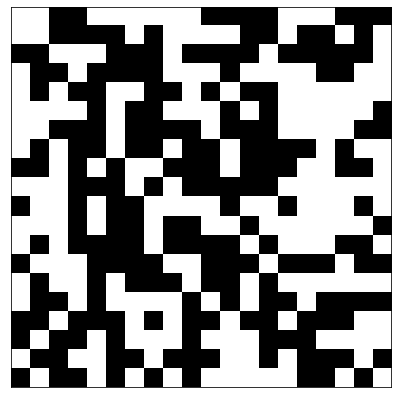

In [30]:
# Graficamos la información usando `matplotlib`
#%%capture
fig, axs = plt.subplots(figsize=(7, 7))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap = plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])

anim = animation.FuncAnimation(fig, animate, frames = MAX_GENERATIONS)

In [31]:
anim